# **DBSCAN Clustering**

DBSCAN Clustering full form is Density-based spatial clustering which is a popular unsupervised learning algorithm to group points in a data set i.e. cluster which are closely packed together and we bind them by analysign the distance between the points. Adding to it, the data points which are far away are considered as outliers which are tried to avoid while working with the data to avoid any mis-predictions. <br>
While grouping we make sure to put together the points which are in a certain distance (epsilon) and have at least a minimum number of points (min_samples) points in the cluster. <br>
- **Epsilon (ε):** The radius within which points must lie to be considered neighbors.
- **MinPts:** The minimum number of points required to form a dense region (cluster core).
- **Core Points:** Points with at least MinPts neighbors within ε radius.
- **Border Points:** Points that are not core points but lie within the ε radius of a core point.
- **Noise Points:** Points that are neither core points nor border points.
#### Mathematical Definitions
1. Neighborhood: <br>
N
ϵ
​
 (p)={q∈D∣dist(p,q)≤ϵ}<br>
where,  dist
(
𝑝
,
𝑞
)
dist(p,q) is the distance between points
𝑝
p and
𝑞
q.
2. Core Point:<br>
∣N
ϵ
​
 (p)∣≥MinPts
3. Border Point:<br>
∃
𝑝
∈
𝐷
∣
∣
𝑁
𝜖
(
𝑝
)
∣
≥
MinPts and dist
(
𝑝
,
𝑞
)
≤
𝜖
∃p∈D∣∣N
ϵ
​
 (p)∣≥MinPts and dist(p,q)≤ϵ
4. Noise Point:<br>
𝑝
 is not a core point and not a border point
p is not a core point and not a border point

In [1]:
import numpy as np

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None

    def fit(self, X):
        n_samples = X.shape[0]
        self.labels_ = -1 * np.ones(n_samples)  # Initialize labels to -1 (noise)
        cluster_id = 0

        for i in range(n_samples):
            if self.labels_[i] != -1:
                continue  # Already classified

            neighbors = self._region_query(X, i)

            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1  # Mark as noise
            else:
                self._expand_cluster(X, i, neighbors, cluster_id)
                cluster_id += 1

    def _region_query(self, X, point_idx):
        neighbors = []
        for i in range(X.shape[0]):
            if np.linalg.norm(X[i] - X[point_idx]) < self.eps:
                neighbors.append(i)
        return neighbors

    def _expand_cluster(self, X, point_idx, neighbors, cluster_id):
        self.labels_[point_idx] = cluster_id

        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if self.labels_[neighbor_idx] == -1:
                self.labels_[neighbor_idx] = cluster_id  # Change noise to border point
            elif self.labels_[neighbor_idx] == -1:
                self.labels_[neighbor_idx] = cluster_id  # Change unclassified to cluster id

                new_neighbors = self._region_query(X, neighbor_idx)
                if len(new_neighbors) >= self.min_samples:
                    neighbors += new_neighbors  # Add new neighbors to expand

            i += 1

    def predict(self, X):
        raise NotImplementedError("Predict method is not implemented for DBSCAN.")

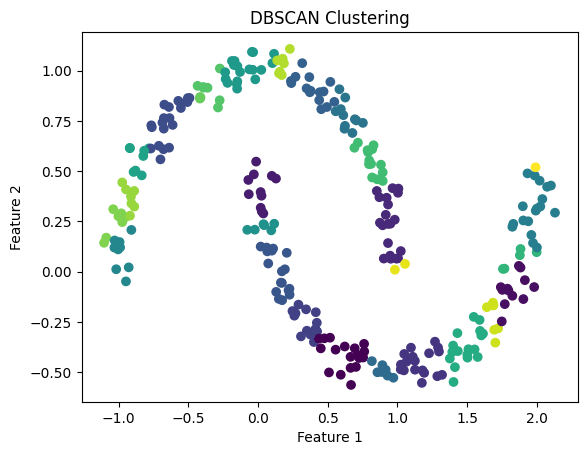

In [2]:
# testing case
if __name__ == "__main__":
    from sklearn.datasets import make_moons
    import matplotlib.pyplot as plt

    X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan.fit(X)

    plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
    plt.title("DBSCAN Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()